## GOLD PRICE PREDICTION MACHINE LEARNING PROJECT USING PYTHON

In [1]:
# importing the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#  Data Collection

In [2]:
# importing the dataset
df = pd.read_csv('gld_price_data.csv')

In [3]:
# printing the first five rows of the dataset
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# printing the last five rows of the dataset
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# calculating the number of datapoints in the dataset
df.shape

(2290, 6)

In [6]:
# fectiching general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking for missing values in the dataset
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting basic statiscal information about the dataset
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
# finding the features with only one values
for column in df.columns:
    print(column,df[column].nunique())

Date 2290
SPX 2277
GLD 1930
USO 1514
SLV 1331
EUR/USD 2066


In [10]:
# exploring the categorical feature
categorical_features = [feature for feature in df.columns if((df[feature].dtypes=='O')&(feature not in ['GLD']))]
categorical_features

['Date']

In [11]:
for feature in categorical_features:
    print("The name of the feature is {} and the number of categories are {}".format(feature,len(df[feature].unique())))

The name of the feature is Date and the number of categories are 2290


Exploring the Numerical Features

    There are two type of numerical features:
        1. Continious 
        2. Discrete

In [12]:
numerical_features = [feature for feature in df.columns if((df[feature].dtypes!='O')&(feature not in ['GLD']))]
print("The number of numerical features in the dataset is:",len(numerical_features))

# printing the first five numerical features
df[numerical_features].head()

The number of numerical features in the dataset is: 4


,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [13]:
# finding the number of discreate numerical feature
discreate_feature = [feature for feature in numerical_features if len(df[feature].unique())<25]
print("The number of Discreate features in the dataset is: {}".format(len(discreate_feature)))

The number of Discreate features in the dataset is: 0


In [36]:
# finding the number of continous numerical_feature
conti_features = [feature for feature in numerical_features if feature not in discreate_feature+['GLD']]
print("The number of continous features in the dataset is: {}".format(len(conti_features)))

The number of continous features in the dataset is: 4


# Data Visualization

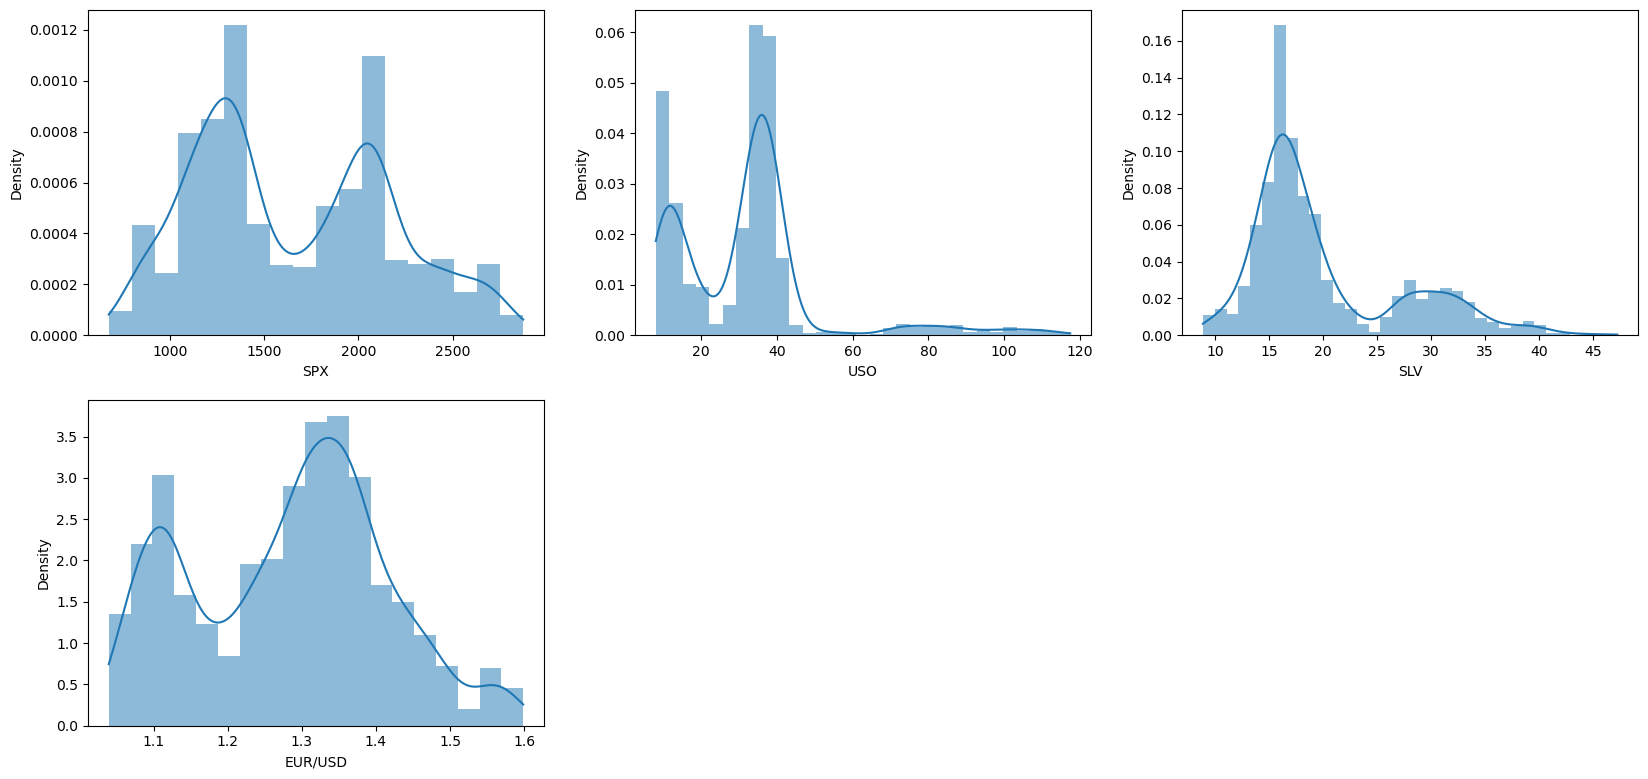

In [15]:
# visualizing the distribution in Continous Numerical Feature
plt.figure(figsize=(20,60),facecolor='white')
plotnumber = 1
for conti_feature in conti_features:
    b = plt.subplot(12,3,plotnumber)
    sns.histplot(df[conti_feature],kde=True,stat='density',linewidth=0)
    plt.xlabel(conti_feature)
    plotnumber+=1
plt.show()

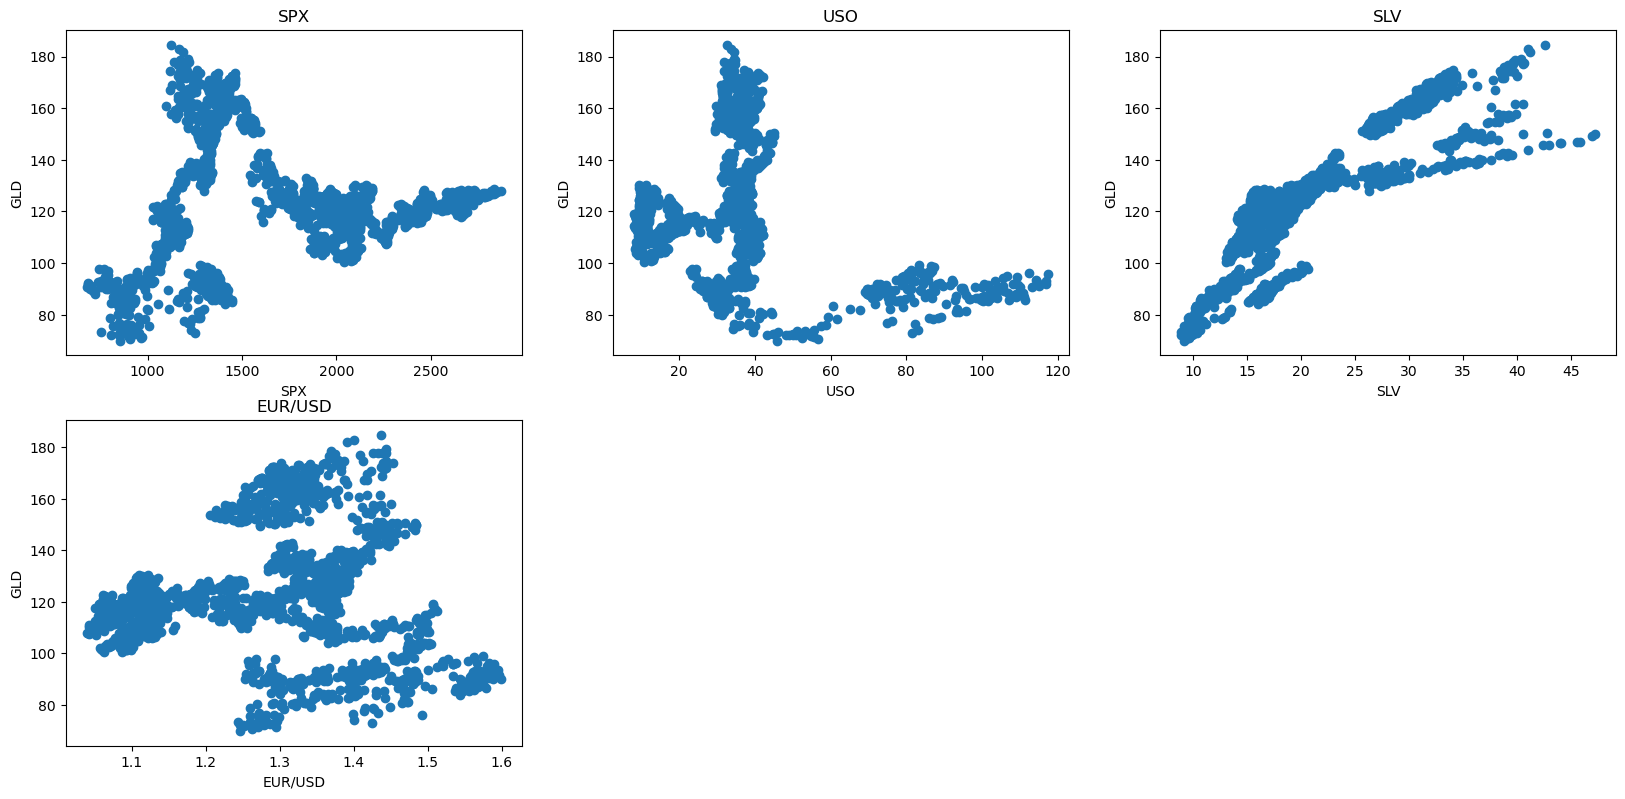

In [16]:
# relation between the continous numerical feature and labels
plt.figure(figsize=(20,60),facecolor='white')
plot_number = 1
for feature in conti_features:
    cx = plt.subplot(12,3,plot_number)
    plt.scatter(df[feature],df['GLD'])
    plt.xlabel(feature)
    plt.ylabel('GLD')
    plt.title(feature)
    plot_number+=1
plt.show()

Conclusion from above graphs

    * The silver feature is linearly progessing with Gold

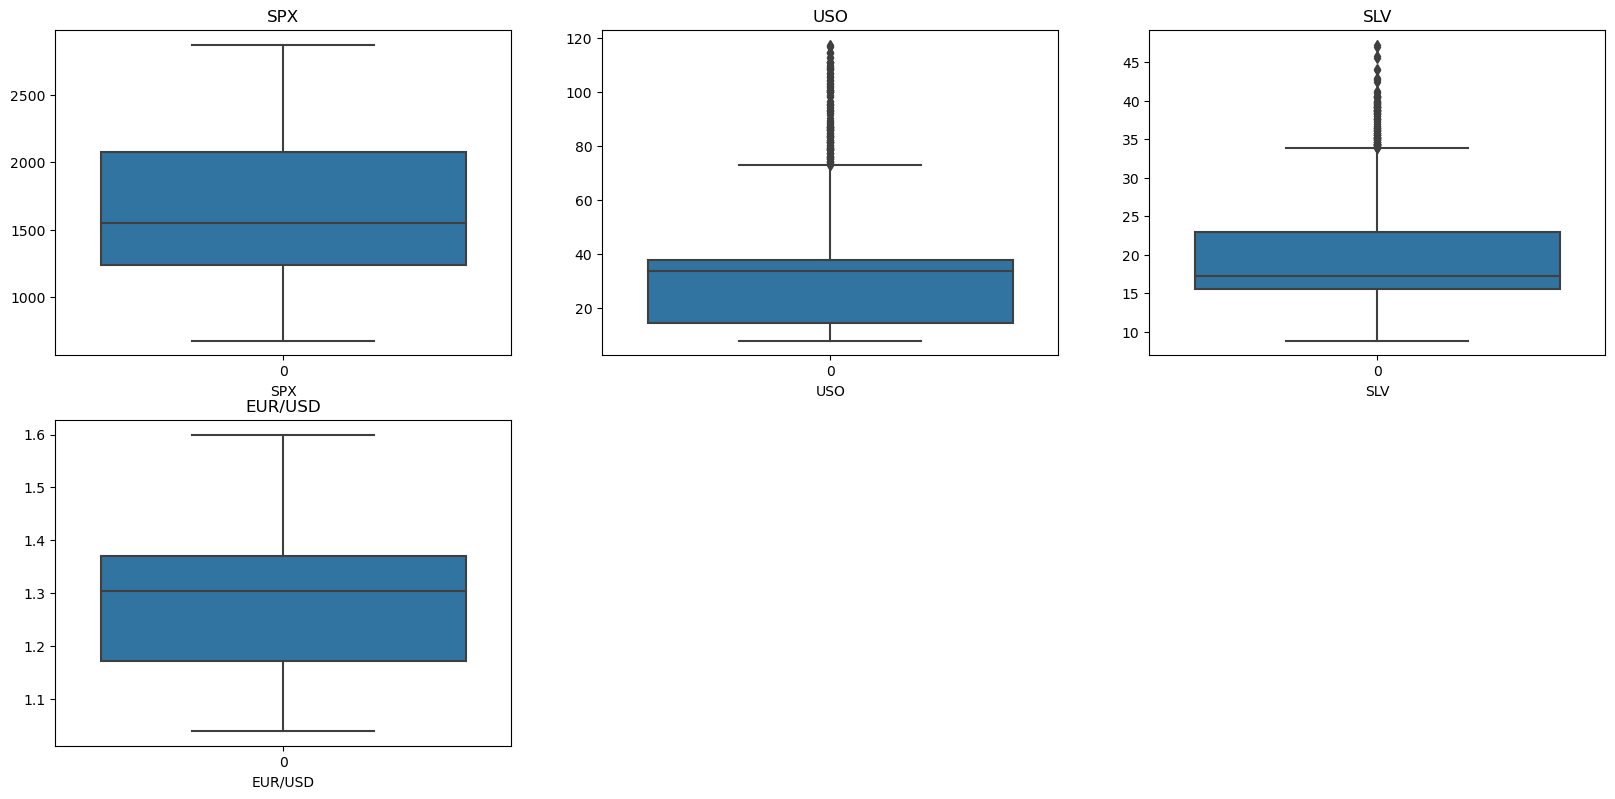

In [17]:
# finding the outiers in the dataset features
plt.figure(figsize=(20,60),facecolor='white')
plot_num = 1
for numerical_feature in numerical_features:
    dx = plt.subplot(12,3,plot_num)
    sns.boxplot(data=df[numerical_feature])
    plt.xlabel(numerical_feature)
    plt.title(numerical_feature)
    plot_num+=1
plt.show()

Conclusion of Outlier from above graph

    * On visualising the above graphs USD and SPX have Outliers

Next step: Finding correlation between the different features in the dataset

There are two types of correlation:

    1. Positive Correlation
    2. Negative Correlation

In [18]:
# calculating the correlation between the different features in the dataset
correlation = df.corr()

<AxesSubplot:>

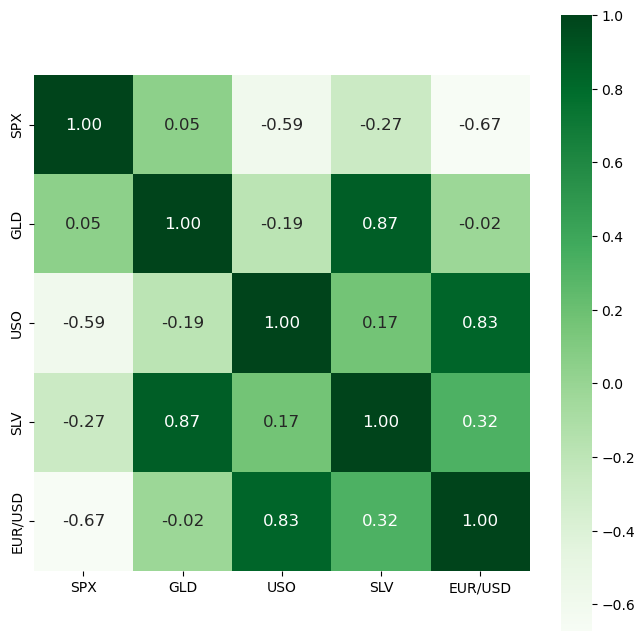

In [19]:
# constructing a heatmap to understand the correlation 
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot = True,annot_kws={'size':12},cmap = "Greens")

In [20]:
# displaying the correlation values for GLD Price
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot:xlabel='GLD', ylabel='Density'>

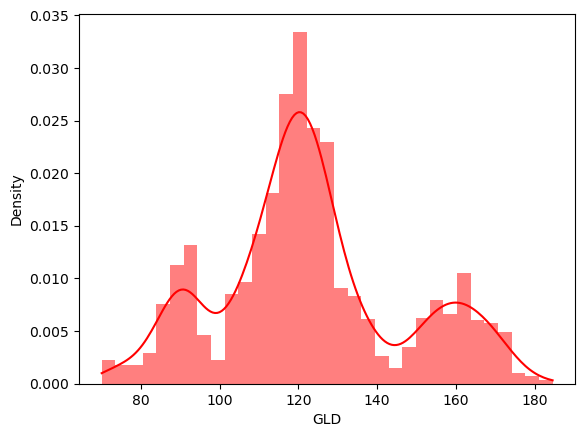

In [21]:
# check the distribution of Gold Price
sns.histplot(df['GLD'],kde=True,stat='density',linewidth=0,color='red')

# Splitting the features and the target

In [22]:
x = df.drop(['Date','GLD'],axis = 1)
y = df['GLD']

In [23]:
# printing the variable x
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [24]:
# printing the gold prices
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [25]:
# splitting the data into training and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [26]:
# creating the model and training it
regressor = RandomForestRegressor(n_estimators = 100)

In [27]:
# training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [28]:
# model evaluation on test data
test_data_x = regressor.predict(x_test)

In [29]:
# printing the predicted values of x
print(test_data_x)

[127.00999929 116.88389949 139.57500069 121.92639987  94.26370022
 155.09480061 117.60510125 113.30350149 153.74240087 105.54550065
 103.16939912 120.01050126  92.33249922 159.40110129 121.55249842
 117.49000082  86.56959821  91.9250993   93.0058001  125.78710028
  83.04689943 117.57399929 126.36359805 173.38859783 170.10789684
 139.66420265 114.24949935 160.11910329 133.96840065 115.2593004
 110.87210117 104.92650173 127.98350062 122.09050013  98.68309954
 120.32769948  84.23830066 115.04700024 127.42319895 140.26129883
 107.69770068 131.64380121 108.53289921 135.39879961 133.39279915
 149.11569936 119.7116006  157.34690084 156.49990187 127.66100007
 123.65380021 115.43789809 123.9216004  119.30340011 153.71550017
 121.50999996 112.47990018  86.91259986 155.54549917 117.7983008
  88.18879917 114.71549981  83.09149945 146.30869721 125.24169991
 127.37129895 125.0914999  120.76259944 168.1691009  121.78709906
 125.66980156 173.30809802 121.49400148 168.81380139 119.11100045
 127.3263996

In [30]:
# compatring the actual values with predicted values using R square error
error_score_x = metrics.r2_score(y_test,test_data_x)

# ACCURACY


In [35]:
# printing the r square error
print(error_score_x *100)

98.97588092133154


### In Conclusion,I was able to achieve an accuracy of 98.97% in gold price prediction using Machine Learning technique.